In [1]:
# GPU setting
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
# modules setting
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

# DATA DIR

In [3]:
# data selection
# version = ['pillcam_v1', 'pillcam_v2', 'pillcam_v3'] Only version 3
cls = ['negative', 'hemorrhagic', 'depressed', 'protruded']
lesion = {'negative' : ['negative'], 
          'hemorrhagic': ['red_spot', 'angioectasia', 'active_bleeding'],
          'depressed': ['erosion', 'ulcer', 'stricture'],
          'protruded': ['ampulla_of_vater', 'lymphoid_follicles', 'small_bowel_tumor']}

In [ ]:
# path of data folder
dir_data = '/mnt/disk1/project/public/SMhospital/ChoongChoong/dataset/dataset_v3_only_pre_aug/'
path_folder = {}

for i in cls:
    path_folder[i] = {}
    for j in lesion[i]:
        temp = dir_data + '{0}_{1}/{2}'.format(cls.index(i), i, j)
        path_folder[i][j] = temp
        
print(path_folder)

In [ ]:
list_data = {}
for i in cls:
    list_data[i] = {}
    for j in lesion[i]:
        list_data[i][j] = []
        temp = os.listdir(path_folder[i][j])
        list_data[i][j].append(temp)

print(list_data)

# DATA PRE-PROCESSING

In [ ]:
# for papaer writing, it needs to be revised
def pre_process(img):
    img = np.array(img, dtype = 'f4')
    img_pre = img[32:544, 32:544, :]
    for i in range(100):
        for j in range(100):
            if i + j > 99:
                pass
            else :
                img_pre[i, j, :] = 0
                img_pre[i, 511 - j, :] = 0
    return img_pre

In [ ]:
dir_data_pre = '/mnt/disk1/project/public/SMhospital/ChoongChoong/dataset_v3_only_pre/'
for i in cls:
    for j in lesion[i]:
        for k in list_data[i][j][0]:
            temp = cv2.imread(dir_data + '{0}_{1}/{2}/{3}'.format(cls.index(i), i, j, k))
            temp_pre = pre_process(temp)
            cv2.imwrite(dir_data_pre + '{0}_{1}/{2}/{3}'.format(cls.index(i), i, j, k), temp_pre)

# SPLIT DATA INTO Train (80%) / Test (20%)

In [4]:
# data selection
# version = ['pillcam_v1', 'pillcam_v2', 'pillcam_v3'] Only version 3
cls = ['negative', 'hemorrhagic', 'depressed', 'protruded']
lesion = {'negative' : ['negative'], 
          'hemorrhagic': ['red_spot', 'angioectasia', 'active_bleeding'],
          'depressed': ['erosion', 'ulcer', 'stricture'],
          'protruded': ['ampulla_of_vater', 'lymphoid_follicles', 'small_bowel_tumor']}

In [5]:
# path of data folder
dir_data = '/mnt/disk1/project/public/SMhospital/ChoongChoong/dataset/dataset_v3_only_pre_aug/'
path_folder = {}

for i in cls:
    path_folder[i] = {}
    for j in lesion[i]:
        temp = dir_data + '{0}_{1}/{2}'.format(cls.index(i), i, j)
        path_folder[i][j] = temp
        
print(path_folder)

{'negative': {'negative': '/mnt/disk1/project/public/SMhospital/ChoongChoong/dataset/dataset_v3_only_pre_aug/0_negative/negative'}, 'hemorrhagic': {'red_spot': '/mnt/disk1/project/public/SMhospital/ChoongChoong/dataset/dataset_v3_only_pre_aug/1_hemorrhagic/red_spot', 'angioectasia': '/mnt/disk1/project/public/SMhospital/ChoongChoong/dataset/dataset_v3_only_pre_aug/1_hemorrhagic/angioectasia', 'active_bleeding': '/mnt/disk1/project/public/SMhospital/ChoongChoong/dataset/dataset_v3_only_pre_aug/1_hemorrhagic/active_bleeding'}, 'depressed': {'erosion': '/mnt/disk1/project/public/SMhospital/ChoongChoong/dataset/dataset_v3_only_pre_aug/2_depressed/erosion', 'ulcer': '/mnt/disk1/project/public/SMhospital/ChoongChoong/dataset/dataset_v3_only_pre_aug/2_depressed/ulcer', 'stricture': '/mnt/disk1/project/public/SMhospital/ChoongChoong/dataset/dataset_v3_only_pre_aug/2_depressed/stricture'}, 'protruded': {'ampulla_of_vater': '/mnt/disk1/project/public/SMhospital/ChoongChoong/dataset/dataset_v3_on

In [ ]:
dir_data_pre = '/mnt/disk1/project/public/SMhospital/ChoongChoong/dataset_v3_only_pre/'
for i in cls:
    for j in lesion[i]:
        for k in list_data[i][j][0]:
            temp = cv2.imread(dir_data + '{0}_{1}/{2}/{3}'.format(cls.index(i), i, j, k))
            temp_pre = pre_process(temp)
            cv2.imwrite(dir_data_pre + '{0}_{1}/{2}/{3}'.format(cls.index(i), i, j, k), temp_pre)

# IMPORT DATASET

In [8]:
dir_data_pre_aug = '/mnt/disk1/project/public/SMhospital/ChoongChoong/dataset/dataset_v3_only_pre_aug/'
data_x = [None]*len(cls)
for i in cls:
    data_x[cls.index(i)] = [None]*len(lesion[i])
    for j in lesion[i]:
        data_x[cls.index(i)][lesion[i].index(j)] = []
        dir_folder_temp = dir_data_pre_aug + '{0}_{1}/{2}/'.format(cls.index(i), i, j)
        dir_temp = os.listdir(dir_folder_temp)
        for k in dir_temp:
            temp = cv2.imread(dir_folder_temp + k)
            data_x[cls.index(i)][lesion[i].index(j)].append([k, temp])

2
f_r3_석강___00-33-14___2008825.jpg


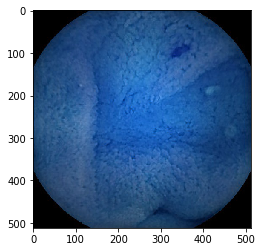

In [10]:
print(len(data_x[1][0][0]))
print(data_x[1][0][0][0])
plt.imshow(data_x[1][0][0][1])

# SPLIT DATASET

In [11]:
def split(data_x):
    num_data = len(data_x)
    num_train_data = int(num_data*0.8)
    
    train_idx = set(np.random.choice(num_data, num_train_data, replace = False))
    test_idx = set(np.arange(num_data)) - train_idx
    
    train_x = []
    test_x = []
    
    for i in train_idx:
        train_x.append(data_x[i])
    for i in test_idx:
        test_x.append(data_x[i])

    return train_x, test_x

In [12]:
data_x_train = [None]*len(cls)
data_x_test = [None]*len(cls)
for i in cls:
    data_x_train[cls.index(i)] = [None]*len(lesion[i])
    data_x_test[cls.index(i)] = [None]*len(lesion[i])
    for j in lesion[i]:
        data_x_train[cls.index(i)][lesion[i].index(j)] = []
        data_x_test[cls.index(i)][lesion[i].index(j)] = []
        data_x_train[cls.index(i)][lesion[i].index(j)], data_x_test[cls.index(i)][lesion[i].index(j)] = split(data_x[cls.index(i)][lesion[i].index(j)])

2
<class 'str'>


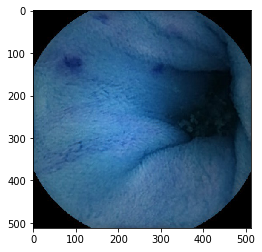

In [22]:
print(len(data_x_test[1][0][0]))
print(type(data_x_test[1][0][0][0]))
plt.imshow(data_x_test[1][0][0][1])

2
김혜___02-01-09___2019935.jpg


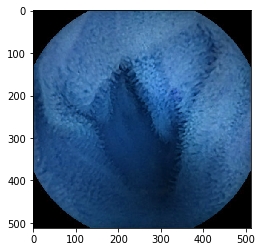

In [18]:
print(len(data_x_train[1][1][0]))
print(data_x_train[1][0][1][0])
plt.imshow(data_x_train[1][0][1][1])

In [19]:
cv2.imwrite('/mnt/disk1/project/public/SMhospital/ChoongChoong/dataset/dataset_v3_only_pre_aug/test.jpg', data_x_train[1][0][1][1])

True

# SAVE DATA

## 1. Train

In [25]:
dir_train_data = '/mnt/disk1/project/public/SMhospital/ChoongChoong/dataset/dataset_v3_only_pre_aug/train/'
dir_test_data = '/mnt/disk1/project/public/SMhospital/ChoongChoong/dataset/dataset_v3_only_pre_aug/test/'
for i in cls:
    for j in lesion[i]:
        for k in data_x_train[cls.index(i)][lesion[i].index(j)]:
            temp_name = k[0]
            temp_img = k[1]
            cv2.imwrite(dir_train_data + '{0}_{1}/{2}/'.format(cls.index(i), i, j) + temp_name, temp_img)
        for l in data_x_test[cls.index(i)][lesion[i].index(j)]:
            temp_name = l[0]
            temp_img = l[1]
            cv2.imwrite(dir_test_data + '{0}_{1}/{2}/'.format(cls.index(i), i, j) + temp_name, temp_img)